# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2*numpy.sin(x))

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x) - 2)

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return(g(xmax)-g(xmin))

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    del_x = (xmax-xmin)/(N)
    sum  = 0.0 
    sum = f(xmax) + f(xmin)
    #2*other points
    for i in range (1, N):
        sum += 2*f(xmin+i*del_x)
    #4*midpoints 
    for i in range (1, N+1):
        m_i = xmin+(del_x)*(2*i-1)/2
        sum += 4*f(m_i)
    return (del_x/6 * sum)

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Fractional error between numerical and analytical integral')

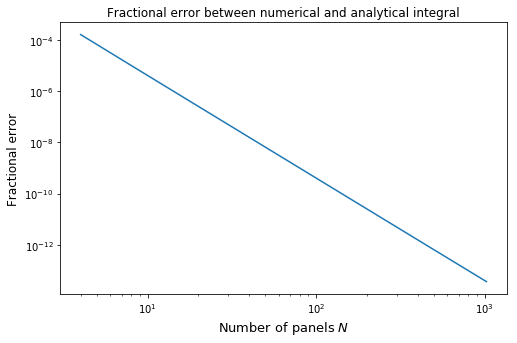

In [12]:
#Task 1 Graphing 
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

#Finds the difference between numerical and analytical integral values list
error  = []
for i in range(0, len(panel_counts)):
    error.append(result_analytic - (integrate_numeric(x0, x1, panel_counts[i])))

#Creates the figure
plt.figure(figsize = (8,5))
plt.loglog((panel_counts), error/result_analytic)
plt.xlabel("Number of panels $N$", fontsize = "13")
plt.ylabel("Fractional error", fontsize = "12")
plt.title("Fractional error between numerical and analytical integral")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Generally, increasing the number of panels $N$ increases the accuracy of the calculation. From the Riemann sum definition of an integral 
$$\int_{a}^{b} f(x) d x=\sum_{i=0}^{N-1} \int_{x_{i}}^{x_{i+1}} f\left(x_{i}\right) d x = \lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^{N-1} f\left(x_{i}\right)\,.$$

Naturally, when doing this numerically, we are unable to do this with infinite panels but if we increase the number of rectangular panels being used, we get closer to the analytical value of the integral (in the case of the rectangular method). 

The same logic applies to Simpson's rule except rather than using rectangles, we approximate the function using a quadratic function, in other words, we  divide the area into $N$ parabolic panels. However, the same logic applies where if we use more panels, the actual size of the panels gets smaller such that we reduce the error due to the 'fitting' of a quadratic function to a function that may not be quadratic. Hence, $\textit{generally}$ speaking, the error decreases as $N$ increases, in particular, the error decreases with $N^{-4}$. 

However, if we use too many panels, the process is very costly. Running the following code 

N_P = 10**3

print (integrate_analytic(0,4))

print(integrate_numeric(0,4,N_P))

gives the output 
1.0965907296271418

1.0965907296288002

while if do: 
N_P = 10**6

print (integrate_analytic(0,4))

print(integrate_numeric(0,4,N_P))

we get:

1.0965907296271418

1.0965907296272173

Although, we were  accurate with $10^6$ panels, the code takes considerably longer to execute for arguably very little gain; we were accurate to 12 significant figures with $10^3$ panels but we only gained one additional significant figure of accuracy (for a total of 13) with $10^6$ panels. This is due to the rapid scaling of the error in Simpson's rule $N^{-4}$ but at the same time we have to do $2N+1$ function evaluations which results in a much longer time to do the computation for very little payoff. 

In addition, we also run into issues of numerical precision. When we define the width of the interval 
$$\Delta x = \frac{x_\text{max} - x_\text{min}}{N}\, ,$$
we have similar sources of numerical error when we differentiate, namely that (especially when the limits of the integral are very close together), we are potentially dividing a small number by a much larger number due to the relative difference between their orders of magnitude (as we can only represent floating point numbers to finite precision). Thus we are essentially trading the mathematical in origin error by using too many panels for the numerical error which is due to the limitations of computers in calculating the panel width. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If we used the trapezium rule, we would need to use considerably more panels in order to achieve the same numerical precision as Simpson's rule as the error scales with $N^{-2}$ for the trapezium rule. In addition, it will also require conisderabe computational resources as we have to do $N+1$ function evaluations for the trapezium rule but we will need to do it for a much larger $N$ then Simpson's rule (despite Simpson's rule having $2N+1$ function evaluations). 

In addition,  we run into the same numerical issues discussed above for Simpson's rule except they will probably be more pronounced due to us having to use a larger number of panels than we would for Simpson's rule. 